# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


### Import data

In [3]:
drive = "D"
date = "20240504"
mdl = "rfr"
mdl = "gbr"
mdl = "abr"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [5]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
#csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [6]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [7]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [8]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(189, 297)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [9]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [10]:
df

,uid,site_clean,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,70,nt001.2011,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-963139.00,963139.00,2033821.00,-266174.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,24,barkely01.2011,20111025,135.04,-18.00,0.00,0.00,0.00,0.00,0.00,...,-1995622.00,1995622.00,1967000.00,-635406.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,26,barkely03.2011,20111026,135.29,-18.02,0.00,0.00,0.00,0.00,0.00,...,-1703353.00,1703353.00,2254432.00,-530218.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,27,barkely04.2011,20111026,135.23,-17.98,0.00,0.00,0.00,0.00,0.00,...,-2256318.00,2256318.00,2646032.00,-303355.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,25,barkely02.2011,20111026,135.26,-18.06,0.00,0.00,0.00,0.00,0.00,...,-2041078.00,2041078.00,3188841.00,399323.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,158,site23.2023,20230916,132.54,-12.66,320.02,347.99,1359.66,4423.39,3354.31,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,155,site20.2023,20230916,131.56,-12.81,602.67,654.04,2204.47,11815.54,5206.21,...,-2002328.00,2002328.00,3735369.00,567737.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
186,156,site21.2023,20230916,131.57,-12.82,1934.59,2097.90,5741.75,22983.80,12704.86,...,-1072797.00,1072797.00,5216990.00,1735106.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00
187,157,site22.2023,20230916,132.25,-12.77,568.16,616.63,2503.13,16614.99,5420.45,...,-1377778.00,1377778.00,4443054.00,1184880.00,1823000.00,2830628.00,1668000.00,3147962.00,5658073.00,8990129.00


## Main only

In [11]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [12]:
#main major and h99 
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major", "h99"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [13]:
df2

,site_clean,target,fire_mean,fire_major,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,rh_tmax_mean,rh_tmin_mean,...,b1_ccw_dry_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
0,nt001.2011,0.00,0.00,0.00,0.00,1.20,32.60,16.30,3311.10,3368.30,...,87.33,394.67,10.33,62.56,25.67,760.33,922.56,2633.89,2777.78,1743.22
1,barkely01.2011,0.00,0.00,0.00,0.30,1.20,37.00,23.60,3312.20,3353.40,...,1.00,613.33,4.11,2.11,92.33,1097.78,1644.89,2756.00,3130.33,1850.89
2,barkely03.2011,0.00,0.00,0.00,0.00,2.10,38.50,23.80,3312.20,3359.00,...,2.25,675.56,3.44,4.22,90.67,1225.89,1728.67,2938.67,3267.11,1857.33
3,barkely04.2011,0.00,0.00,0.00,0.10,2.00,38.60,23.90,3311.90,3358.10,...,9.44,457.78,4.44,3.67,90.11,858.00,1358.11,2717.56,2887.11,1580.67
4,barkely02.2011,0.00,0.00,0.00,0.00,2.00,38.60,23.90,3311.70,3357.80,...,13.22,470.67,8.89,0.22,89.78,930.33,1407.67,3073.11,2837.67,1587.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site23.2023,9471.00,7.60,8.00,0.00,0.50,30.50,16.90,3348.80,3373.30,...,30.11,441.11,24.44,27.78,46.33,712.67,897.67,1833.33,2360.00,1845.44
185,site20.2023,19813.34,0.00,0.00,0.00,2.50,30.70,13.40,3353.90,3376.50,...,54.22,402.33,2.67,42.11,53.67,687.44,1031.78,2699.78,2409.33,1231.00
186,site21.2023,43331.12,0.00,0.00,0.00,2.50,30.70,13.40,3353.90,3376.50,...,81.89,254.44,2.56,56.00,39.78,466.44,578.22,2472.89,1741.44,777.22
187,site22.2023,25116.35,0.00,0.00,0.00,0.80,30.30,15.90,3351.20,3372.00,...,73.42,240.50,2.08,45.58,50.83,485.33,640.08,2308.25,1819.83,888.17


### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [14]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
#  'rain_d_mean', 
#  'et_ma_mean', 
#  'tmax_mean', 
#  'tmin_mean', 
#  'rh_tmax_mean', 
#  'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
#  'dbifmdry_psB1a', 
#  'dbifmdry_psB2a', 
#  'dbifmdry_psB3a', 
#  'dbifmdry_psB4a', 
#  'dbifmdry_psB5a', 
#  'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

d_type = "mm_si_f"

## Main and Major Only

In [15]:
#main and major only
var_ = "main_major_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]
d_type = "mean_major"

In [16]:
#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean','rh_tmin_mean'], axis=1)
df2.columns
d_type = "mean_major_met_rem"

In [17]:
df2.shape

(189, 22)

## Main and veg indicies

In [18]:
var_ = "main_veg_indicies"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'major', 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 #'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 #'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

del df2['fire_mean']
del df2['rh_tmin_mean']

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mm_met_rem"

['site_clean', 'target', 'fire_major', 'b1_wfp_dry_mean', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


## Main, veg indicies and fire

In [ ]:
# var_ = "main_veg_indicies_fire"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR',
#        #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
# 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
#        ]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Remove all target == 0 values

In [19]:
df2 = df2[df2['target']>0.0]
df2.shape

(132, 32)

## Remove site values which seem like outliers

In [20]:
#Dry Fire

#WFP
'''ant03.2012
site12.2023 # lat long error - should be correted
ntagfu0038.2012 # not too bad

'''

# Drop rows where sites seem to be outliers
df3 = df2[df2['site_clean'] != 'ant03.2012']
df4 = df3[df3['site_clean'] != 'site12.2023']
df2 = df4[df4['site_clean'] != 'ntagfu0038.2012']
df2


"""#b1 dbifm
nc02.2013
ntamgd0001.2014
nc02.2013

#b2 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b3 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b4 dbifm
Noisy

#b5 dbifm
reasonable

#b2 dp1
looks pritty reasonable

#b3 dp1
Noisy <1200

#b6 dbifm
wh07.2012
reasonable

#h99

ntastu0003.2016
nttdab0001.2014
ntagfu0035.2012
ntagfu0034.2012

#hcv
site10.2023
site16.2023
site23.2023
girra02.2012
vrd37.2012
ntagfu0034.2012
ntagfu0035.2012

#hmc
nttdab0001.2014
ntastu0003.2016

#n17
ntagfu0003.2012
wh02.2012
wh07.2012 >10
#many are class 1

#wfp looks pritty reasonable

#et ma mean
noisy
"""

'#b1 dbifm\nnc02.2013\nntamgd0001.2014\nnc02.2013\n\n#b2 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b3 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b4 dbifm\nNoisy\n\n#b5 dbifm\nreasonable\n\n#b2 dp1\nlooks pritty reasonable\n\n#b3 dp1\nNoisy <1200\n\n#b6 dbifm\nwh07.2012\nreasonable\n\n#h99\n\nntastu0003.2016\nnttdab0001.2014\nntagfu0035.2012\nntagfu0034.2012\n\n#hcv\nsite10.2023\nsite16.2023\nsite23.2023\ngirra02.2012\nvrd37.2012\nntagfu0034.2012\nntagfu0035.2012\n\n#hmc\nnttdab0001.2014\nntastu0003.2016\n\n#n17\nntagfu0003.2012\nwh02.2012\nwh07.2012 >10\n#many are class 1\n\n#wfp looks pritty reasonable\n\n#et ma mean\nnoisy\n'

## Drop AGB numbers which are low

In [21]:
df2 = df2[df2['target']>0.0]
#df2 = df2[df2['target']>1000.0]
df2.shape

(129, 32)

## Drop AGB numbers which are high

In [ ]:
# drop the 7 tern sites that apear to be outliers
df2 =df2[df2['target'] <= 40000]
df2.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format('target')))
#df2 =df2[df2['target'] > 40000]
#df2.value_counts(['site_clean', value_x, value_y])

In [ ]:
df2

### Remove all outliers 3 std deviations above the mean

In [22]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        #print(mask)
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
        print(filtered_df.shape)
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  b1_wdc_dry_major
mean:  2.140625
std_dev:  0.876053920966595
threshold:  2.6281617628997846
(128, 1)
____________________
column:  b1_n17_dry_major
mean:  4.484375
std_dev:  2.723431066073372
threshold:  8.170293198220115
(128, 2)
____________________
column:  b1_hsd_mean
mean:  102.97520882387957
std_dev:  1.2783316343474647
threshold:  3.8349949030423938
(128, 3)
____________________
column:  b1_hmc_mean
mean:  105.69148650132712
std_dev:  2.877003541657059
threshold:  8.631010624971177
(128, 4)
____________________
column:  b1_hcv_mean
mean:  153.29593116317002
std_dev:  9.69583535765292
threshold:  29.08750607295876
(128, 5)
____________________
column:  b1_h99_mean
mean:  111.44296564321432
std_dev:  4.598426158911983
threshold:  13.795278476735948
(128, 6)
____________________
column:  b1_fdc_dry_major
mean:  2.34375
std_dev:  0.7575083482297705
threshold:  2.2725250446893117
(128, 7)
____________________
column:  b1_ccw_dry_mean
mean:  40.2431144593

In [23]:
ft_orig

,site_clean,target,fire_major,b1_wfp_dry_mean
7,barkely07.2011,1894.20,0.00,3.44
8,ntagfu0001.2012,1536.15,0.00,3.90
9,ntagfu0002.2012,1164.24,10.00,8.33
10,ntagfu0003.2012,4736.01,0.00,7.75
12,ntagfu0005.2012,1549.09,0.00,33.58
...,...,...,...,...
184,site23.2023,9471.00,8.00,17.22
185,site20.2023,19813.34,0.00,34.22
186,site21.2023,43331.12,0.00,60.56
187,site22.2023,25116.35,0.00,51.00


In [24]:
filtered_df

,b1_wdc_dry_major,b1_n17_dry_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_fdc_dry_major,b1_ccw_dry_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,1.00,3.00,100.87,101.66,146.92,104.14,2.00,6.89,616.44,3.67,...,4415426.00,35763554.00,1615977.00,2582020.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,1.00,7.00,101.86,102.64,166.36,107.86,1.00,6.33,465.33,12.50,...,3954276.00,31292203.00,1510107.00,-175857.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,1.00,6.00,101.43,102.40,153.55,105.97,1.00,1.00,449.42,15.42,...,4000000.00,34111527.00,1876268.00,269231.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,1.00,11.00,102.83,104.48,161.30,109.67,2.00,14.08,384.42,33.50,...,4118174.00,34378789.00,1777222.00,310559.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,3.00,8.00,103.20,105.79,154.57,111.97,3.00,53.50,410.83,19.75,...,4874816.00,37696525.00,1300000.00,1552760.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,3.00,8.00,104.70,109.83,151.26,117.52,3.00,67.92,328.00,12.33,...,5906478.00,51883004.00,1435445.00,2511305.00,1541000.00,2298430.00,1362000.00,2623267.00,4885222.00,7059421.00
184,2.00,8.00,103.50,104.50,179.02,112.07,2.00,30.11,441.11,24.44,...,4404715.00,32433582.00,1149782.00,-32626.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,3.00,1.00,103.35,107.11,147.69,112.71,3.00,54.22,402.33,2.67,...,5942115.00,58958724.00,2002328.00,3735369.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
186,3.00,1.00,105.12,112.38,142.76,119.99,3.00,81.89,254.44,2.56,...,6827774.00,65796754.00,1072797.00,5216990.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00


In [25]:
out_df

,site_clean,target,fire_major,b1_wfp_dry_mean,b1_wdc_dry_major,b1_n17_dry_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,barkely07.2011,1894.20,0.00,3.44,1.00,3.00,100.87,101.66,146.92,104.14,...,4415426.00,35763554.00,1615977.00,2582020.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,ntagfu0001.2012,1536.15,0.00,3.90,1.00,7.00,101.86,102.64,166.36,107.86,...,3954276.00,31292203.00,1510107.00,-175857.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,ntagfu0002.2012,1164.24,10.00,8.33,1.00,6.00,101.43,102.40,153.55,105.97,...,4000000.00,34111527.00,1876268.00,269231.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,ntagfu0003.2012,4736.01,0.00,7.75,1.00,11.00,102.83,104.48,161.30,109.67,...,4118174.00,34378789.00,1777222.00,310559.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,ntagfu0005.2012,1549.09,0.00,33.58,3.00,8.00,103.20,105.79,154.57,111.97,...,4874816.00,37696525.00,1300000.00,1552760.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site23.2023,9471.00,8.00,17.22,2.00,8.00,103.50,104.50,179.02,112.07,...,4404715.00,32433582.00,1149782.00,-32626.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,site20.2023,19813.34,0.00,34.22,3.00,1.00,103.35,107.11,147.69,112.71,...,5942115.00,58958724.00,2002328.00,3735369.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
186,site21.2023,43331.12,0.00,60.56,3.00,1.00,105.12,112.38,142.76,119.99,...,6827774.00,65796754.00,1072797.00,5216990.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00
187,site22.2023,25116.35,0.00,51.00,3.00,1.00,104.82,111.21,145.12,118.99,...,6527032.00,62796046.00,1377778.00,4443054.00,1823000.00,2830628.00,1668000.00,3147962.00,5658073.00,8990129.00


In [26]:
# Check for null values
null_values = out_df.isnull().sum()

In [27]:
null_values

site_clean           0
target               0
fire_major           1
b1_wfp_dry_mean      1
b1_wdc_dry_major     1
b1_n17_dry_major     1
b1_hsd_mean          1
b1_hmc_mean          1
b1_hcv_mean          2
b1_h99_mean          1
b1_fdc_dry_major     1
b1_ccw_dry_mean      1
b1_dbifm_dry_mean    2
b1_dp1fm_dry_mean    1
b2_dp1fm_dry_mean    2
b3_dp1fm_dry_mean    1
b2_dbifm_dry_mean    2
b3_dbifm_dry_mean    2
b4_dbifm_dry_mean    1
b5_dbifm_dry_mean    1
b6_dbifm_dry_mean    1
dbifmdry_GSAVI       1
dbifmdry_GNDVI       1
dbifmdry_CVI         1
dbifmdry_RI          4
dbifmdry_NBR         1
dbifmdry_GDVI        1
dbifmdry_MSAVI       1
dbifmdry_DVI         1
dbifmdry_SAVI        1
dbifmdry_NDVI        1
dbifmdry_MSR         2
dtype: int64

In [28]:
out_df.dropna(inplace=True)

In [29]:
df2 = out_df
df2.shape

(123, 32)

In [30]:
#df2 = filtered_df

In [31]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [32]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [33]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_major', 'b1_wfp_dry_mean',
       'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean',
       'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean',
       'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean',
       'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI',
       'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI',
       'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object')


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 7 to 187
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         123 non-null    object 
 1   target             123 non-null    float64
 2   fire_major         123 non-null    float64
 3   b1_wfp_dry_mean    123 non-null    float64
 4   b1_wdc_dry_major   123 non-null    float64
 5   b1_n17_dry_major   123 non-null    float64
 6   b1_hsd_mean        123 non-null    float64
 7   b1_hmc_mean        123 non-null    float64
 8   b1_hcv_mean        123 non-null    float64
 9   b1_h99_mean        123 non-null    float64
 10  b1_fdc_dry_major   123 non-null    float64
 11  b1_ccw_dry_mean    123 non-null    float64
 12  b1_dbifm_dry_mean  123 non-null    float64
 13  b1_dp1fm_dry_mean  123 non-null    float64
 14  b2_dp1fm_dry_mean  123 non-null    float64
 15  b3_dp1fm_dry_mean  123 non-null    float64
 16  b2_dbifm_dry_mean  123 non

In [35]:
df2.columns

Index(['site_clean', 'target', 'fire_major', 'b1_wfp_dry_mean',
       'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean',
       'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean',
       'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean',
       'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI',
       'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI',
       'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object')

### Set variables to plot

In [36]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [37]:
value_y

'b1_wfp_mean'

In [38]:
df2.shape

(123, 32)

In [39]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [40]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [41]:
df2 = df2[df2['target']>0.0]
df2.shape

(123, 32)

In [42]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [43]:
print(column_list[3:])
print(column_list[1:2])

['b1_wfp_dry_mean', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']
['target']


## Choose which data set to run the models from

In [44]:
df_ml = df2

In [45]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_major', 'b1_wfp_dry_mean', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [46]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [47]:
print(list(df_ml))

['target', 'fire_major', 'b1_wfp_dry_mean', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [48]:
df_ml.shape

(123, 31)

In [49]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 7 to 187
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             123 non-null    float64
 1   fire_major         123 non-null    float64
 2   b1_wfp_dry_mean    123 non-null    float64
 3   b1_wdc_dry_major   123 non-null    float64
 4   b1_n17_dry_major   123 non-null    float64
 5   b1_hsd_mean        123 non-null    float64
 6   b1_hmc_mean        123 non-null    float64
 7   b1_hcv_mean        123 non-null    float64
 8   b1_h99_mean        123 non-null    float64
 9   b1_fdc_dry_major   123 non-null    float64
 10  b1_ccw_dry_mean    123 non-null    float64
 11  b1_dbifm_dry_mean  123 non-null    float64
 12  b1_dp1fm_dry_mean  123 non-null    float64
 13  b2_dp1fm_dry_mean  123 non-null    float64
 14  b3_dp1fm_dry_mean  123 non-null    float64
 15  b2_dbifm_dry_mean  123 non-null    float64
 16  b3_dbifm_dry_mean  123 non

In [50]:
df_ml.head(5)

,target,fire_major,b1_wfp_dry_mean,b1_wdc_dry_major,b1_n17_dry_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_fdc_dry_major,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,1894.20,0.00,3.44,1.00,3.00,100.87,101.66,146.92,104.14,2.00,...,4415426.00,35763554.00,1615977.00,2582020.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,1536.15,0.00,3.90,1.00,7.00,101.86,102.64,166.36,107.86,1.00,...,3954276.00,31292203.00,1510107.00,-175857.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,1164.24,10.00,8.33,1.00,6.00,101.43,102.40,153.55,105.97,1.00,...,4000000.00,34111527.00,1876268.00,269231.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,4736.01,0.00,7.75,1.00,11.00,102.83,104.48,161.30,109.67,2.00,...,4118174.00,34378789.00,1777222.00,310559.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,1549.09,0.00,33.58,3.00,8.00,103.20,105.79,154.57,111.97,3.00,...,4874816.00,37696525.00,1300000.00,1552760.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00


## Reduce level of 0 values

In [51]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
#no0_df = df_ml[df_ml['target']>=10.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [52]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(123, 31)

In [53]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 7 to 187
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             123 non-null    float64
 1   fire_major         123 non-null    float64
 2   b1_wfp_dry_mean    123 non-null    float64
 3   b1_wdc_dry_major   123 non-null    float64
 4   b1_n17_dry_major   123 non-null    float64
 5   b1_hsd_mean        123 non-null    float64
 6   b1_hmc_mean        123 non-null    float64
 7   b1_hcv_mean        123 non-null    float64
 8   b1_h99_mean        123 non-null    float64
 9   b1_fdc_dry_major   123 non-null    float64
 10  b1_ccw_dry_mean    123 non-null    float64
 11  b1_dbifm_dry_mean  123 non-null    float64
 12  b1_dp1fm_dry_mean  123 non-null    float64
 13  b2_dp1fm_dry_mean  123 non-null    float64
 14  b3_dp1fm_dry_mean  123 non-null    float64
 15  b2_dbifm_dry_mean  123 non-null    float64
 16  b3_dbifm_dry_mean  123 non

In [54]:
test = df_ml[df_ml['target']>40000.0]

In [55]:
test.shape

(1, 31)

In [56]:
df_ml.dropna(inplace=True)

In [57]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 7 to 187
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             123 non-null    float64
 1   fire_major         123 non-null    float64
 2   b1_wfp_dry_mean    123 non-null    float64
 3   b1_wdc_dry_major   123 non-null    float64
 4   b1_n17_dry_major   123 non-null    float64
 5   b1_hsd_mean        123 non-null    float64
 6   b1_hmc_mean        123 non-null    float64
 7   b1_hcv_mean        123 non-null    float64
 8   b1_h99_mean        123 non-null    float64
 9   b1_fdc_dry_major   123 non-null    float64
 10  b1_ccw_dry_mean    123 non-null    float64
 11  b1_dbifm_dry_mean  123 non-null    float64
 12  b1_dp1fm_dry_mean  123 non-null    float64
 13  b2_dp1fm_dry_mean  123 non-null    float64
 14  b3_dp1fm_dry_mean  123 non-null    float64
 15  b2_dbifm_dry_mean  123 non-null    float64
 16  b3_dbifm_dry_mean  123 non

# Scatter plots with error

fire_major
fire_major
Regression
slope:  5.760292538564881e-06
intersept:  2.108025496529373
r2:  0.014613266575918176
P_value:  0.8725480853837866
std error:  3.5830937516419485e-05


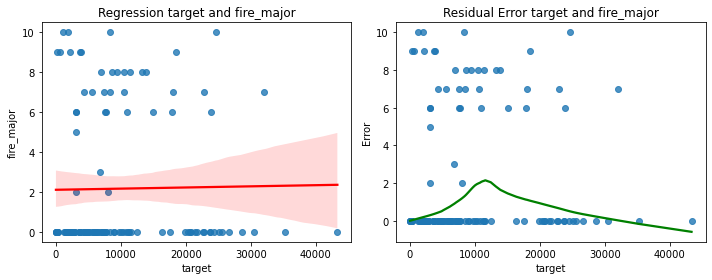

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0015489498294525583
intersept:  11.251151435167923
r2:  0.739597720770557
P_value:  1.5185907745771503e-22
std error:  0.0001281433010439364


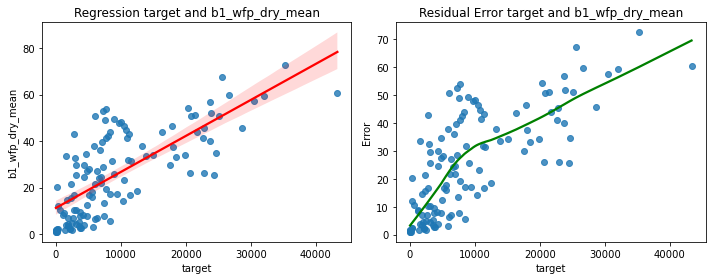

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_wdc_dry_major
b1_wdc_dry_major
Regression
slope:  6.253468423331784e-05
intersept:  1.5375938531200406
r2:  0.6437826868025638
P_value:  9.625005925085205e-16
std error:  6.757229910608654e-06


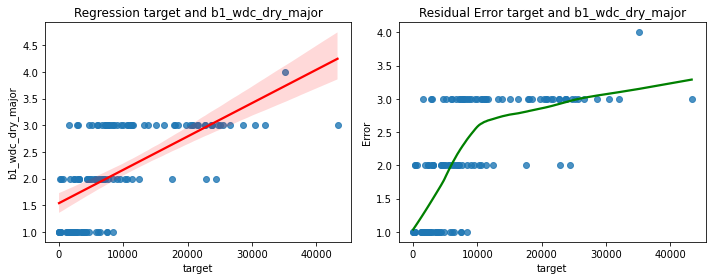

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_n17_dry_major
b1_n17_dry_major
Regression
slope:  -4.368139291540081e-05
intersept:  4.877275794835318
r2:  -0.14241115060776105
P_value:  0.11611077389119226
std error:  2.7600095052562528e-05


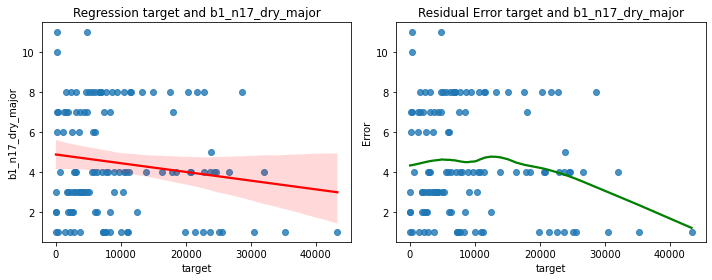

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_hsd_mean
b1_hsd_mean
Regression
slope:  9.968721272506186e-05
intersept:  102.06121076236442
r2:  0.6889548326665248
P_value:  1.271582591615547e-18
std error:  9.534035485524564e-06


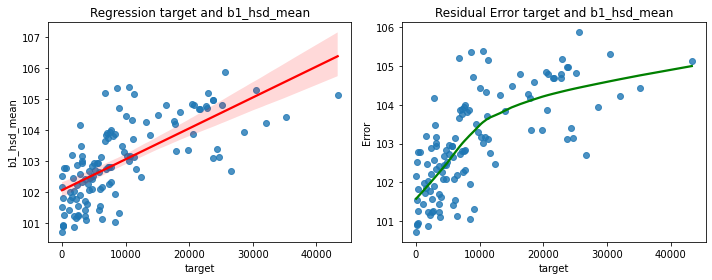

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00024007502263720414
intersept:  103.42736255747988
r2:  0.7334658703816016
P_value:  5.054864440045328e-22
std error:  2.022592744824147e-05


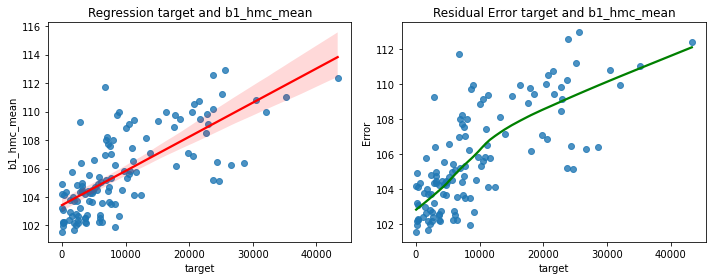

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_hcv_mean
b1_hcv_mean
Regression
slope:  -0.00010734641010292774
intersept:  154.9881588951031
r2:  -0.10409967400956716
P_value:  0.2518575032277097
std error:  9.323510381404544e-05


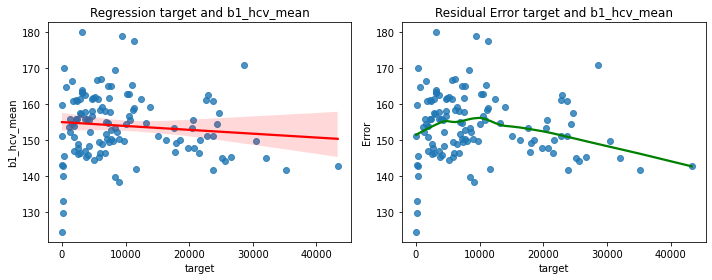

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_h99_mean
b1_h99_mean
Regression
slope:  0.0003626427629938252
intersept:  108.0795532494767
r2:  0.6989426725335176
P_value:  2.4869984261305355e-19
std error:  3.37332928758301e-05


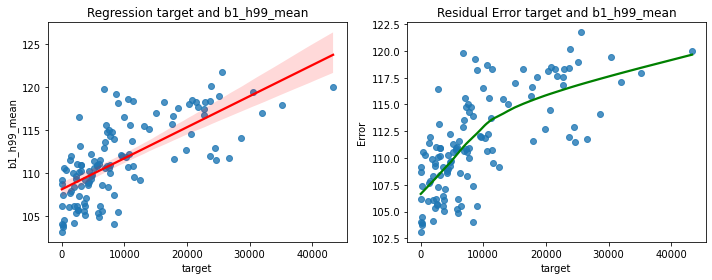

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_fdc_dry_major
b1_fdc_dry_major
Regression
slope:  5.007390665850925e-05
intersept:  1.867036118552764
r2:  0.6032665089506665
P_value:  1.531788509569366e-13
std error:  6.018134185039798e-06


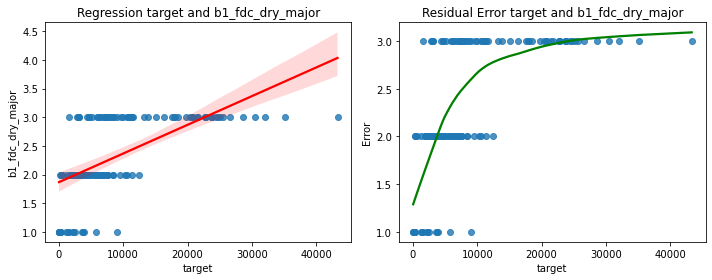

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.0021020473224650812
intersept:  19.787559853457438
r2:  0.7178614894166165
P_value:  9.334794110132786e-21
std error:  0.00018532516892969447


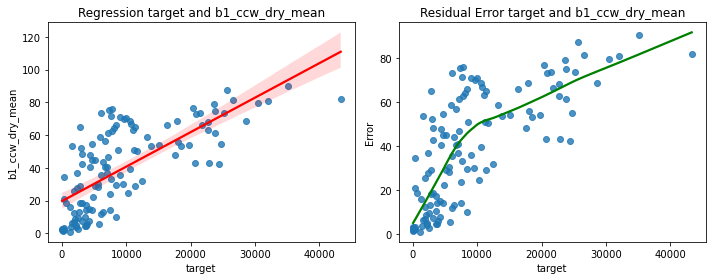

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.00899562192266787
intersept:  471.5935460754268
r2:  -0.6270977711809705
P_value:  8.492733003282616e-15
std error:  0.00101579849827245


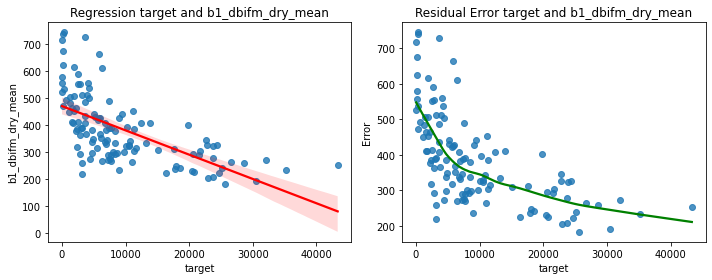

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.000355173253359511
intersept:  14.13421281875518
r2:  -0.34320693547101805
P_value:  0.00010182282955513518
std error:  8.836438408284541e-05


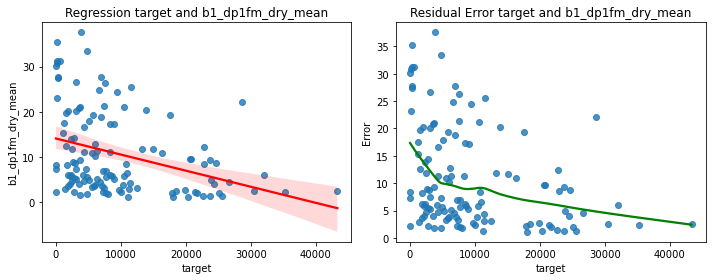

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0013315319008030185
intersept:  16.79045922546281
r2:  0.7345629381545982
P_value:  4.0863084666393686e-22
std error:  0.00011181644746029234


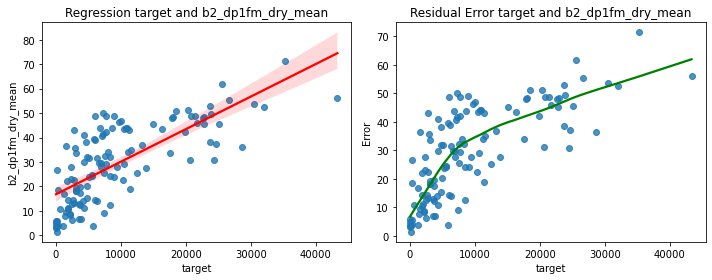

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0009790766972916818
intersept:  67.61325798127368
r2:  -0.5898570004291963
P_value:  7.035025861495229e-13
std error:  0.00012184956256397674


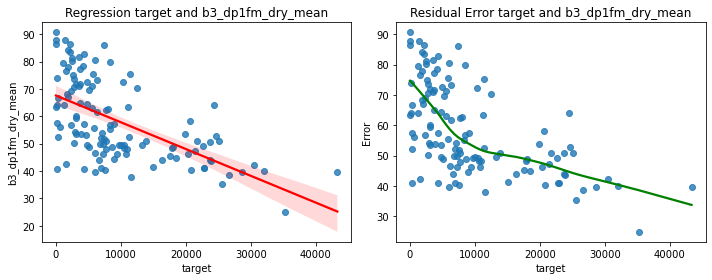

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.013348982328853131
intersept:  778.6919989667742
r2:  -0.6279497896921452
P_value:  7.623134980124683e-15
std error:  0.0015040138440174323


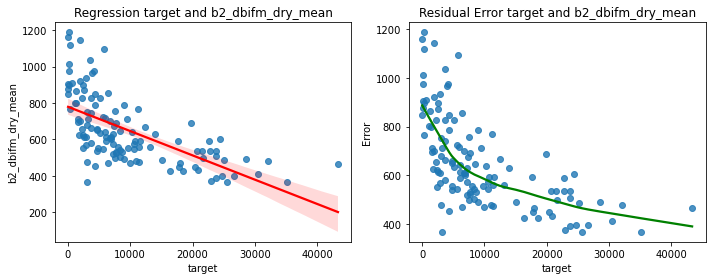

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.021803365025975442
intersept:  1115.5677460770646
r2:  -0.6382598774282584
P_value:  2.0082399081617652e-15
std error:  0.002390688730379991


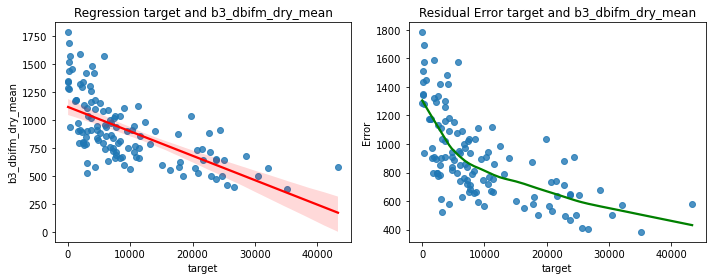

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  0.0020647515622315977
intersept:  2045.1181356087945
r2:  0.061314778764400384
P_value:  0.5004989868199118
std error:  0.0030555686723404423


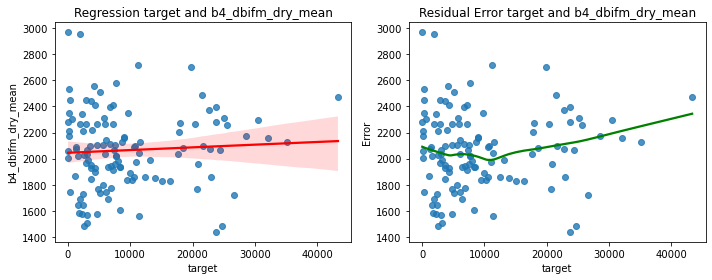

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.03555639559868629
intersept:  2680.775611852392
r2:  -0.6483873657690605
P_value:  5.153018290896056e-16
std error:  0.003795354747042628


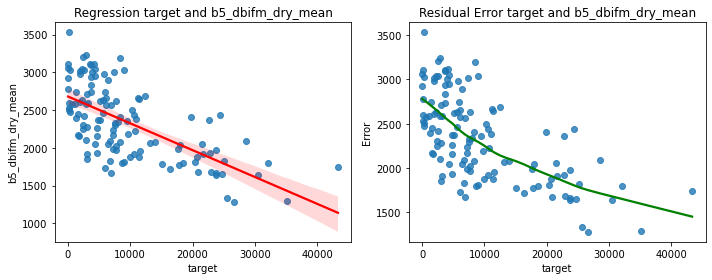

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.035171810759678124
intersept:  1810.5243697053822
r2:  -0.6673895291988785
P_value:  3.4781174081465547e-17
std error:  0.003567871031237682


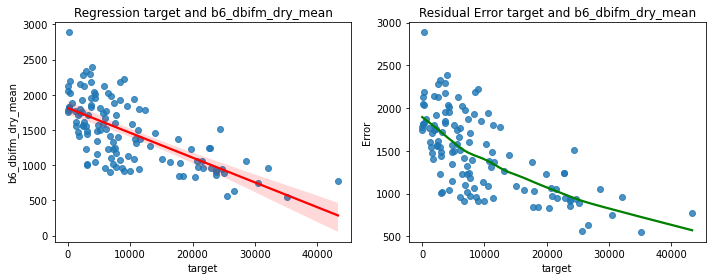

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  33.840251479198315
intersept:  2419547.2133389013
r2:  0.6174306095228174
P_value:  2.8276528844070242e-14
std error:  3.91940984259274


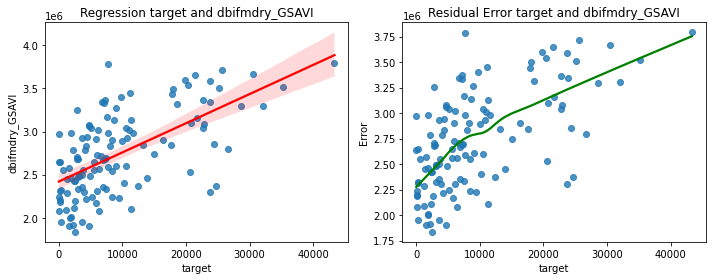

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  76.46272824106987
intersept:  4516486.895027915
r2:  0.737297279023647
P_value:  2.3937739674867526e-22
std error:  6.369184489573928


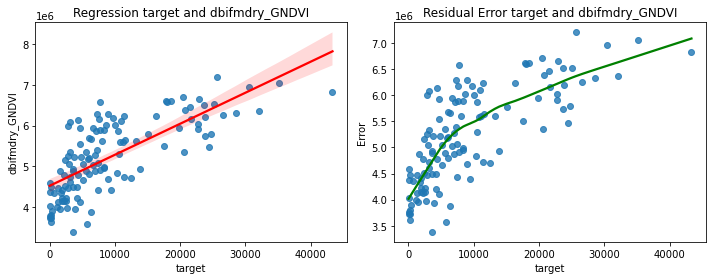

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  805.8538638736226
intersept:  38295793.65245713
r2:  0.6815262304740544
P_value:  4.104060683854119e-18
std error:  78.66285219581935


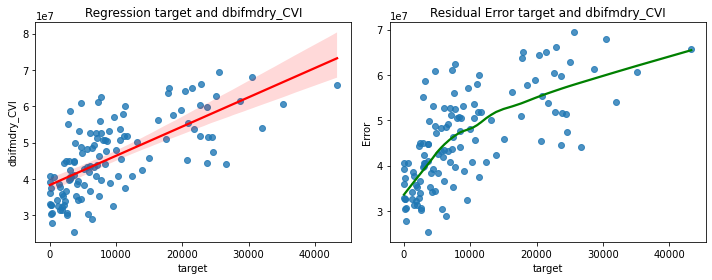

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -23.521911286335826
intersept:  1792233.3846928366
r2:  -0.4820777122086276
P_value:  1.6453472475870343e-08
std error:  3.8862493069379993


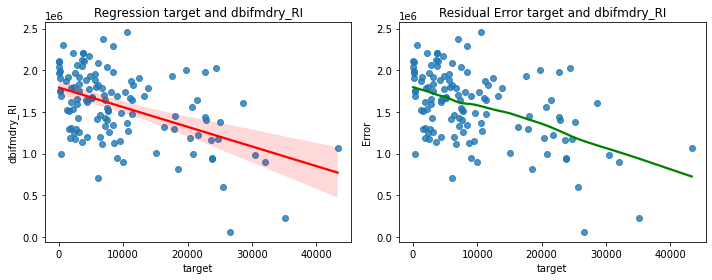

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  129.31141401856823
intersept:  576584.3355538892
r2:  0.6782445690367491
P_value:  6.811938509573921e-18
std error:  12.736450703427684


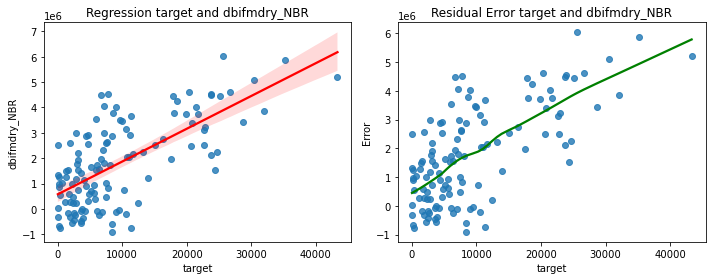

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  15.41048973370657
intersept:  1266496.7437922312
r2:  0.4939044855260096
P_value:  6.430831414589467e-09
std error:  2.466371224104581


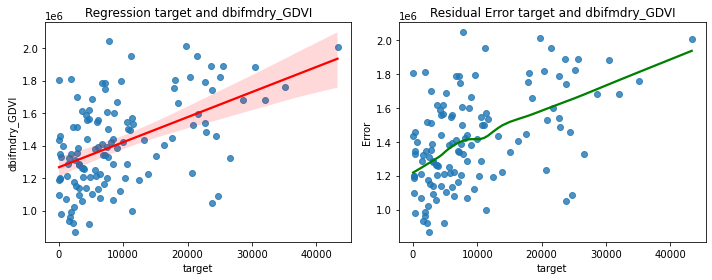

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  46.36352698982871
intersept:  1468188.2476572176
r2:  0.7059194131119497
P_value:  7.640355051599428e-20
std error:  4.2290331536434635


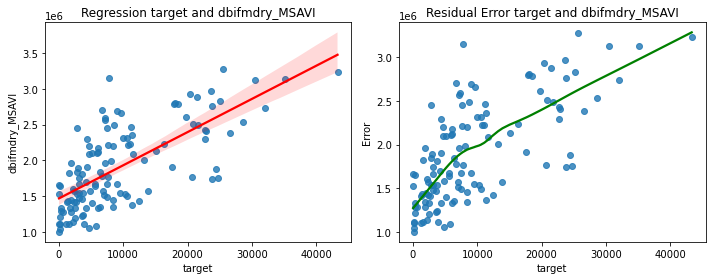

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  23.86668774431311
intersept:  929589.5287160913
r2:  0.6540416124486231
P_value:  2.357459474419631e-16
std error:  2.5094539656160397


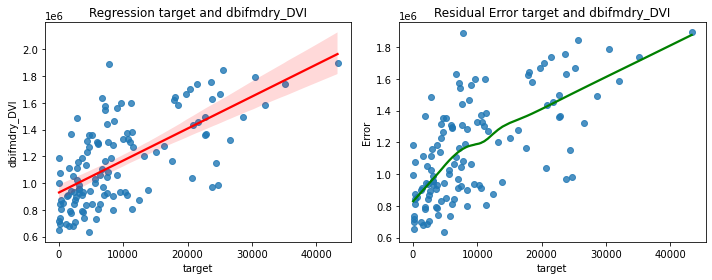

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  50.22183130397234
intersept:  1706928.234538171
r2:  0.7148792543375343
P_value:  1.59394923557342e-20
std error:  4.46579052544409


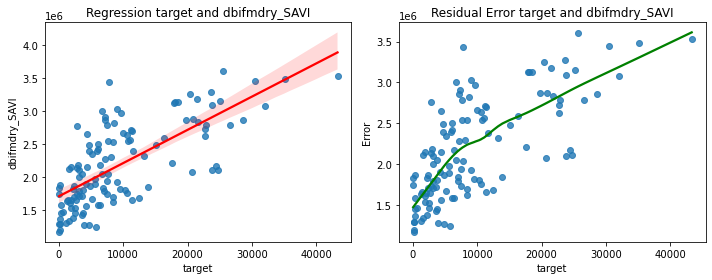

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  106.1575497468383
intersept:  2983771.562310149
r2:  0.752350313033571
P_value:  1.113820746188316e-23
std error:  8.45020902176773


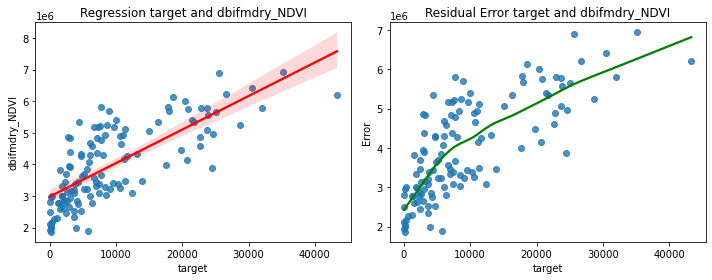

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962


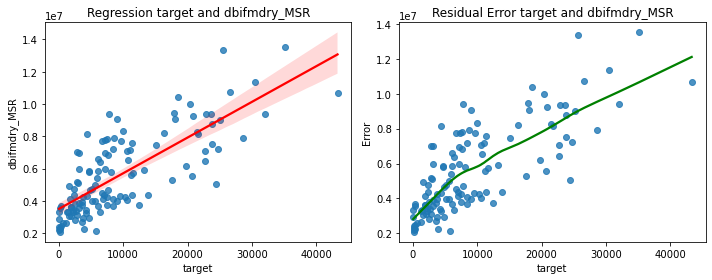

--------------------------------------------------
Residuals
slope:  220.82153472192363
intersept:  3503046.471536801
r2:  0.774730923856357
P_value:  7.570778042006057e-26
std error:  16.383809690076962


In [58]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

In [61]:
#df_ml.to_csv(, index=False)
df_ml.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\gt1000lt40000_3std_no_null.csv".format(drive, date), index=False)

In [62]:
df_ml.describe()

,target,fire_major,b1_wfp_dry_mean,b1_wdc_dry_major,b1_n17_dry_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_fdc_dry_major,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
count,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,...,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00
mean,9474.54,2.16,25.93,2.13,4.46,103.01,105.70,153.97,111.52,2.34,...,5240936.17,45930889.36,1569374.07,1801750.67,1412504.07,1907461.40,1155715.45,2182757.05,3989565.65,5595229.22
std,8838.19,3.48,18.51,0.86,2.71,1.28,2.89,9.11,4.59,0.73,...,916580.44,10450501.73,431239.94,1685054.53,275763.57,580476.66,322515.21,620902.31,1247079.68,2519149.59
min,18.48,0.00,1.00,1.00,1.00,100.72,101.55,124.43,103.12,1.00,...,3384468.00,25412028.00,62735.00,-901894.00,869000.00,1001333.00,636000.00,1169041.00,1868958.00,2081843.00
25%,3039.70,0.00,7.97,1.00,2.00,102.05,103.53,147.84,108.41,2.00,...,4481635.50,38068915.00,1278289.00,358073.50,1204000.00,1435884.50,905000.00,1687031.00,3016037.50,3651754.00
50%,6726.41,0.00,25.56,2.00,4.00,102.87,104.94,153.91,110.91,2.00,...,5216853.00,44807299.00,1638298.00,1568159.00,1389000.00,1766056.00,1108000.00,2101408.00,3816689.00,4948288.00
75%,12014.57,6.00,41.29,3.00,7.00,103.93,107.86,160.74,115.05,3.00,...,6002261.50,52903694.50,1891813.50,2980096.00,1599000.00,2337443.00,1366000.00,2680736.50,5014680.50,7355504.00
max,43331.12,10.00,72.56,4.00,11.00,105.87,112.95,179.98,121.73,3.00,...,7202744.00,69374485.00,2453826.00,6035524.00,2045000.00,3281569.00,1894000.00,3603833.00,6939020.00,13524145.00


In [63]:
# Check for null values
null_values = df_ml.isnull().sum()

In [64]:
null_values

target               0
fire_major           0
b1_wfp_dry_mean      0
b1_wdc_dry_major     0
b1_n17_dry_major     0
b1_hsd_mean          0
b1_hmc_mean          0
b1_hcv_mean          0
b1_h99_mean          0
b1_fdc_dry_major     0
b1_ccw_dry_mean      0
b1_dbifm_dry_mean    0
b1_dp1fm_dry_mean    0
b2_dp1fm_dry_mean    0
b3_dp1fm_dry_mean    0
b2_dbifm_dry_mean    0
b3_dbifm_dry_mean    0
b4_dbifm_dry_mean    0
b5_dbifm_dry_mean    0
b6_dbifm_dry_mean    0
dbifmdry_GSAVI       0
dbifmdry_GNDVI       0
dbifmdry_CVI         0
dbifmdry_RI          0
dbifmdry_NBR         0
dbifmdry_GDVI        0
dbifmdry_MSAVI       0
dbifmdry_DVI         0
dbifmdry_SAVI        0
dbifmdry_NDVI        0
dbifmdry_MSR         0
dtype: int64

In [65]:
df = df_ml

In [66]:
# Function to check if a value is in scientific notation
def is_scientific_notation(value):
    try:
        float_value = float(value)
        return '{:e}'.format(float_value) == value.lower()
    except ValueError:
        return False

# Check for scientific notation in each cell
for column in df.columns:
    for value in df[column]:
        if is_scientific_notation(str(value)):
            print(f"Column {column}: {value} is in scientific notation")

# Model

### Split off unseen data

In [67]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [68]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(68, 30) (68,)
(30, 30) (30,)


### Plot up Histograms for train and test datasets

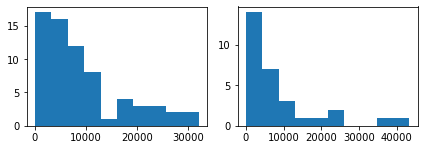

In [69]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [70]:
#print(xdata1)

In [71]:
print(ydata)

[1.8942000e+03 1.5361500e+03 4.7360132e+03 1.5490861e+03 1.9475867e+03
 1.2936000e+03 2.5408459e+03 1.7966666e+03 2.3572266e+03 2.6087600e+03
 1.9209960e+03 2.8332131e+03 2.3895994e+03 2.1469141e+04 3.7422000e+03
 1.1180400e+04 2.2699391e+04 4.8727769e+03 5.5881421e+03 3.1569021e+03
 8.0314502e+03 7.6585425e+03 7.7112935e+03 3.1231201e+03 1.7994760e+04
 4.3709121e+03 3.9154500e+03 3.5199711e+04 6.8991998e+02 7.2031958e+03
 3.6158325e+03 6.0447378e+03 5.6064385e+03 3.6687932e+03 8.3762158e+03
 3.0861599e+03 2.8320320e+03 6.0060000e+03 6.3602002e+03 2.4740100e+03
 2.3737561e+04 9.0309453e+03 8.4137900e+03 1.1338128e+04 2.6636295e+04
 1.2432934e+04 1.0273340e+04 7.4328101e+03 7.2401177e+03 2.4024001e+02
 1.8480000e+01 1.6632001e+02 2.9567999e+02 1.2936000e+02 6.6990000e+03
 5.5439999e+01 7.3919998e+01 1.1596200e+04 3.6483931e+03 7.7153999e+03
 9.7089648e+03 4.2688799e+03 1.3490400e+03 3.0861599e+03 7.3919998e+01
 6.3756001e+03 2.2881072e+04 7.1505176e+03 1.0763322e+04 2.0631123e+04
 4.142

In [74]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=0)



if mdl == "rfr":

    # Define model
    model = rfr()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [2, 10, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
        'max_depth': [None, 2, 3, 4, 5, 10, 20],
        #'min_samples_split': [2, 3, 4, 5, 10],
        #'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }
elif mdl == "gbr":
    # Define model
    model = gbr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }

elif mdl == "abr":
    # Define model
    model = abr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }
else:
    print("ERROR__"*100)

# Define custom scorer for RMSE
def custom_rmse_scorer(y_true, y_pred):
    rmse = -np.sqrt(mean_squared_error(y_true, y_pred))
    #print("rmse: ", rmse)
    return rmse

# Define custom scorer for MAE
def custom_mae_scorer(y_true, y_pred):
    mae = -mean_absolute_error(y_true, y_pred)
    #print("mae: ", mae)
    return mae

# Define custom scorer for MAE
def custom_r2_scorer(y_true, y_pred):
    # Mean of true target values
    y_mean = np.mean(y_true)

    # Calculate sum of squares of residuals
    ss_residual = np.sum((y_true - y_pred) ** 2)
    #print("ss_residual: ", ss_residual)

    # Calculate sum of squares of total
    ss_total = np.sum((y_true - y_mean) ** 2)
    #print("ss_total: ", ss_total)
    
    # Calculate R^2
    r2 = 1 - (ss_residual / ss_total)
    print("r2: ", r2)


    #r2 = r2_score(y_true, y_pred)
    #print("r2: ", r2)
    return r2

# Make it a scorer
#rmse_scorer = make_scorer(custom_rmse_scorer)
#mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)

# def custom_r2_scorer(y_true, y_pred):

#     r2 = r2_score(y_true, y_pred)
#     print("r2: ", r2)
#     return r2

# Make it a scorer
rmse_scorer = make_scorer(custom_rmse_scorer)
mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)
# -------------------------------------------------------------------

# Create GridSearchCV object with RMSE scoring
grid_search_rmse = GridSearchCV(model, param_grid, scoring=rmse_scorer, cv=5)
grid_search_rmse.fit(X_train, y_train)


print(mdl)
print("-"*100)
# Print the best score and parameters
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)

# Create GridSearchCV object with MAE scoring
grid_search_mae = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search_mae.fit(X_train, y_train)

# Print the best score and parameters
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)

# Create GridSearchCV object with r2 scoring
grid_search_r2 = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search_r2.fit(X_train, y_train)

# Print the best score and parameters
print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2 Best Parameters: ", grid_search_r2.best_params_)

abr
----------------------------------------------------------------------------------------------------
RMSE Best Score:  -5683.255658622683
RMSE Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 150}
MAE Best Score:  -4046.2584696296194
MAE Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 10}
r2:  0.707284386728579
r2:  -0.4017534748499261
r2:  -0.3044828712269496
r2:  0.04100566435259978
r2:  0.499367165356312
r2:  0.6772562095359462
r2:  0.03223031680697952
r2:  -0.029863955183815127
r2:  -0.30542437550814183
r2:  0.9134121236155535
r2:  0.7822388558728874
r2:  0.22954316703426025
r2:  0.3387284819722518
r2:  -0.1071582713170689
r2:  0.7836634557067294
r2:  0.7519174762023939
r2:  0.06915409062066746
r2:  0.3027346534118671
r2:  -0.16284559909641727
r2:  0.7380665549000652
r2:  0.7399308977501544
r2:  0.12085341116702564
r2:  0.26009821007767053
r2:  -0.1470911502775618
r2:  0.7716498310591924
r2:  0.7681353536780535
r2:  0.06505925682409097
r2:  0.3223856014674556

In [75]:
# Get best RMSE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_rmse.best_estimator_
fac = "RMSE"

In [ ]:
# Get best MAE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_mae.best_estimator_
fac = "MAE"


In [ ]:
# Get best R2 parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_r2.best_estimator_
fac = "r2"

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [76]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.93
Fitted model mse = 4273807.98
n = 68


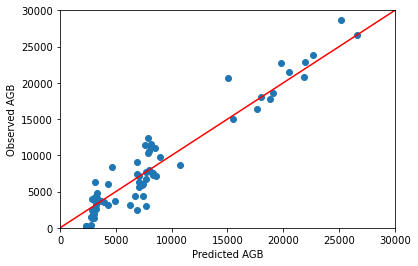

In [77]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.69249554126032
MSE = 34391333.469
RMSE = 5864.412
bias = -726.064
n = 30


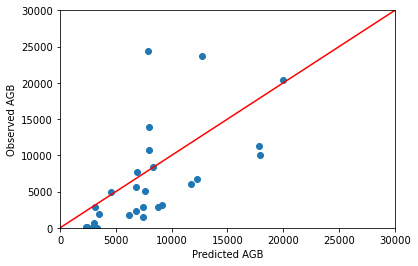

In [78]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                 band                      n
20     dbifmdry_GNDVI    0.14280524865111144
4         b1_hsd_mean    0.10115861312537203
23       dbifmdry_NBR     0.0995024019558897
12  b2_dp1fm_dry_mean    0.08167470862998326
5         b1_hmc_mean    0.07778425992092974
28      dbifmdry_NDVI    0.06568163013002043
17  b5_dbifm_dry_mean    0.06223723601647569
13  b3_dp1fm_dry_mean   0.056835032588198595
18  b6_dbifm_dry_mean    0.04535486977587559
29       dbifmdry_MSR   0.045246250670974486
10  b1_dbifm_dry_mean    0.03527477215121509
1     b1_wfp_dry_mean   0.030865066437258587
9     b1_ccw_dry_mean   0.029648956812928177
7         b1_h99_mean    0.02852112138099304
15  b3_dbifm_dry_mean   0.018847388350688096
11  b1_dp1fm_dry_mean   0.015857028881837442
22        dbifmdry_RI   0.012560338356610582
16  b4_dbifm_dry_mean   0.009575603223440097
21       dbifmdry_CVI   0.008839194247939877
19     dbifmdry_GSAVI   0.005965437195752029
14  b2_dbifm_dry_mean   0.004700745318137268
2    b1_wd

<Figure size 720x432 with 0 Axes>

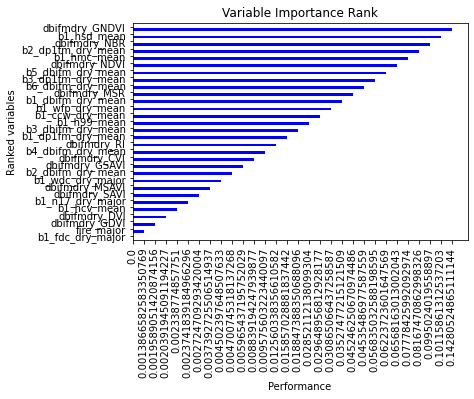

In [79]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [80]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [81]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    30 non-null     object
 1   n       30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes


In [82]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 20 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    30 non-null     object
 1   n       30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 20 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    30 non-null     object 
 1   n       30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [83]:
#Plot has value at the top with very small n value 

In [84]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(20)

In [85]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [86]:
column_var = df_var.band.tolist()

In [87]:
column_var.insert(0, 'target')

In [88]:
column_var

['target',
 'dbifmdry_GNDVI',
 'b1_hsd_mean',
 'dbifmdry_NBR',
 'b2_dp1fm_dry_mean',
 'b1_hmc_mean',
 'dbifmdry_NDVI',
 'b5_dbifm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_MSR',
 'b1_dbifm_dry_mean',
 'b1_wfp_dry_mean',
 'b1_ccw_dry_mean',
 'b1_h99_mean',
 'b3_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'dbifmdry_RI',
 'b4_dbifm_dry_mean',
 'dbifmdry_CVI',
 'dbifmdry_GSAVI']

In [89]:
model_data

,target,fire_major,b1_wfp_dry_mean,b1_wdc_dry_major,b1_n17_dry_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_fdc_dry_major,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,1894.20,0.00,3.44,1.00,3.00,100.87,101.66,146.92,104.14,2.00,...,4415426.00,35763554.00,1615977.00,2582020.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,1536.15,0.00,3.90,1.00,7.00,101.86,102.64,166.36,107.86,1.00,...,3954276.00,31292203.00,1510107.00,-175857.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
10,4736.01,0.00,7.75,1.00,11.00,102.83,104.48,161.30,109.67,2.00,...,4118174.00,34378789.00,1777222.00,310559.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,1549.09,0.00,33.58,3.00,8.00,103.20,105.79,154.57,111.97,3.00,...,4874816.00,37696525.00,1300000.00,1552760.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
17,1947.59,10.00,4.53,1.00,7.00,102.03,103.69,153.91,108.33,2.00,...,4217623.00,35281702.00,1786192.00,274190.00,1345000.00,1442115.00,944000.00,1648428.00,2629526.00,3090187.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,20381.03,0.00,54.33,3.00,8.00,104.85,109.99,153.39,118.10,3.00,...,6705969.00,64330886.00,1183432.00,4625806.00,1820000.00,2930032.00,1700000.00,3255042.00,5998589.00,9995590.00
179,6094.43,0.00,21.67,2.00,8.00,103.14,105.07,167.08,111.55,2.00,...,5687135.00,52648205.00,1828255.00,1729981.00,1556000.00,2123519.00,1292000.00,2422500.00,4306667.00,5852068.00
180,11365.20,8.00,16.62,2.00,8.00,103.12,104.14,177.68,110.78,2.00,...,4723404.00,37604347.00,1480916.00,-734900.00,999000.00,1371033.00,805000.00,1652073.00,3486358.00,4389158.00
182,32025.21,7.00,59.33,3.00,4.00,104.22,109.97,145.09,117.05,3.00,...,6369837.00,54037421.00,902184.00,3841717.00,1681000.00,2738959.00,1586000.00,3076028.00,5801024.00,9398624.00


In [90]:
select_df = model_data[column_var]

In [91]:
df_corr = select_df.corr()
df_corr

,target,dbifmdry_GNDVI,b1_hsd_mean,dbifmdry_NBR,b2_dp1fm_dry_mean,b1_hmc_mean,dbifmdry_NDVI,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,b6_dbifm_dry_mean,...,b1_dbifm_dry_mean,b1_wfp_dry_mean,b1_ccw_dry_mean,b1_h99_mean,b3_dbifm_dry_mean,b1_dp1fm_dry_mean,dbifmdry_RI,b4_dbifm_dry_mean,dbifmdry_CVI,dbifmdry_GSAVI
target,1.00,0.73,0.66,0.67,0.72,0.72,0.74,-0.63,-0.59,-0.65,...,-0.63,0.73,0.70,0.68,-0.63,-0.33,-0.49,0.03,0.68,0.61
dbifmdry_GNDVI,0.73,1.00,0.81,0.86,0.91,0.80,0.97,-0.76,-0.70,-0.86,...,-0.87,0.86,0.87,0.80,-0.82,-0.47,-0.47,0.08,0.94,0.85
b1_hsd_mean,0.66,0.81,1.00,0.74,0.81,0.95,0.80,-0.74,-0.69,-0.77,...,-0.74,0.77,0.79,0.98,-0.71,-0.31,-0.43,0.02,0.75,0.68
dbifmdry_NBR,0.67,0.86,0.74,1.00,0.84,0.78,0.88,-0.77,-0.68,-0.88,...,-0.60,0.83,0.81,0.75,-0.60,-0.39,-0.59,0.34,0.76,0.87
b2_dp1fm_dry_mean,0.72,0.91,0.81,0.84,1.00,0.82,0.94,-0.81,-0.83,-0.85,...,-0.80,0.94,0.94,0.81,-0.82,-0.43,-0.67,0.05,0.77,0.77
b1_hmc_mean,0.72,0.80,0.95,0.78,0.82,1.00,0.80,-0.72,-0.69,-0.75,...,-0.67,0.79,0.80,0.97,-0.65,-0.32,-0.48,0.13,0.73,0.73
dbifmdry_NDVI,0.74,0.97,0.80,0.88,0.94,0.80,1.00,-0.83,-0.74,-0.91,...,-0.85,0.90,0.90,0.80,-0.87,-0.47,-0.68,0.01,0.84,0.79
b5_dbifm_dry_mean,-0.63,-0.76,-0.74,-0.77,-0.81,-0.72,-0.83,1.00,0.76,0.94,...,0.78,-0.76,-0.77,-0.73,0.84,0.21,0.71,0.26,-0.59,-0.47
b3_dp1fm_dry_mean,-0.59,-0.70,-0.69,-0.68,-0.83,-0.69,-0.74,0.76,1.00,0.66,...,0.62,-0.79,-0.79,-0.66,0.62,-0.15,0.56,-0.03,-0.59,-0.58
b6_dbifm_dry_mean,-0.65,-0.86,-0.77,-0.88,-0.85,-0.75,-0.91,0.94,0.66,1.00,...,0.81,-0.80,-0.81,-0.77,0.85,0.43,0.67,0.11,-0.72,-0.64


In [92]:
dfsort.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.csv".format(var_, d_type, fac, mdl)))
df_corr.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_select_variable_corrolation.csv".format(var_, d_type, fac, mdl)))

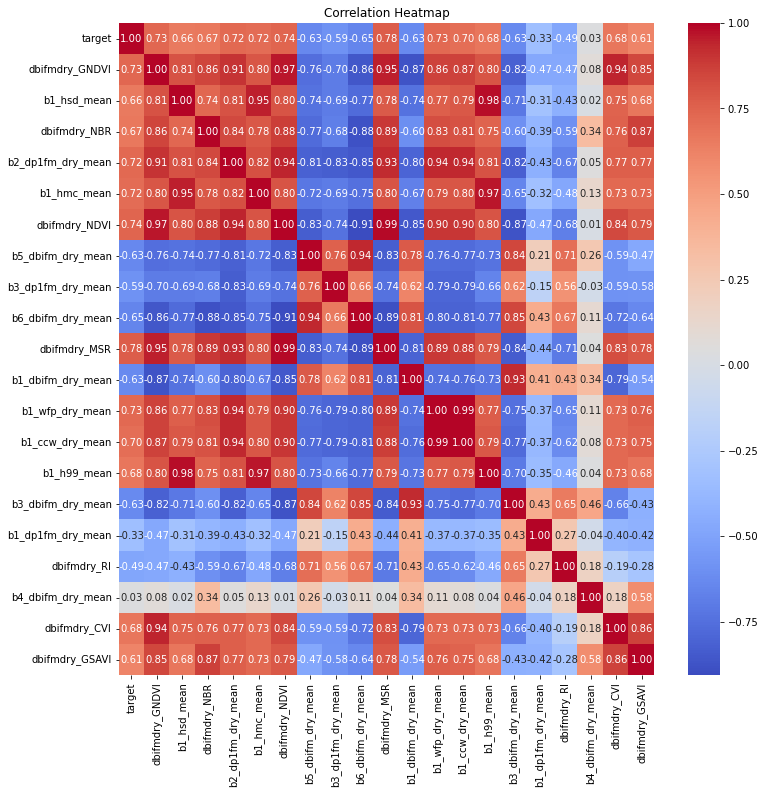

In [93]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [94]:
select_df

,target,dbifmdry_GNDVI,b1_hsd_mean,dbifmdry_NBR,b2_dp1fm_dry_mean,b1_hmc_mean,dbifmdry_NDVI,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,b6_dbifm_dry_mean,...,b1_dbifm_dry_mean,b1_wfp_dry_mean,b1_ccw_dry_mean,b1_h99_mean,b3_dbifm_dry_mean,b1_dp1fm_dry_mean,dbifmdry_RI,b4_dbifm_dry_mean,dbifmdry_CVI,dbifmdry_GSAVI
7,1894.20,4415426.00,100.87,2582020.00,10.67,101.66,3014544.00,3013.67,84.11,1741.67,...,616.44,3.44,6.89,104.14,1585.44,3.67,1615977.00,2953.89,35763554.00,2982851.00
8,1536.15,3954276.00,101.86,-175857.00,9.50,102.64,2599388.00,2448.58,76.50,1707.75,...,465.33,3.90,6.33,107.86,968.67,12.50,1510107.00,1648.25,31292203.00,1903015.00
10,4736.01,4118174.00,102.83,310559.00,15.33,104.48,2525814.00,1935.75,49.58,1482.25,...,384.42,7.75,14.08,109.67,941.83,33.50,1777222.00,1577.17,34378789.00,1907658.00
12,1549.09,4874816.00,103.20,1552760.00,36.50,105.79,3816689.00,2176.00,42.42,1477.33,...,410.83,33.58,53.50,111.97,904.00,19.75,1300000.00,2020.00,37696525.00,2573872.00
17,1947.59,4217623.00,102.03,274190.00,11.31,103.69,2629526.00,2980.88,67.06,2146.44,...,507.38,4.53,8.80,108.33,1323.88,20.25,1786192.00,2267.75,35281702.00,2463671.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,20381.03,6705969.00,104.85,4625806.00,51.17,109.99,5998589.00,1812.33,46.08,833.83,...,230.33,54.33,76.75,118.10,567.42,1.25,1183432.00,2267.08,64330886.00,3539020.00
179,6094.43,5687135.00,103.14,1729981.00,38.92,105.07,4306667.00,2572.92,46.58,1513.17,...,352.58,21.67,35.50,111.55,854.67,12.83,1828255.00,2146.42,52648205.00,3017063.00
180,11365.20,4723404.00,103.12,-734900.00,18.88,104.14,3486358.00,2649.06,75.44,1804.81,...,385.69,16.62,28.88,110.78,752.25,4.31,1480916.00,1557.44,37604347.00,2106114.00
182,32025.21,6369837.00,104.22,3841717.00,52.58,109.97,5801024.00,1795.25,39.83,961.92,...,273.33,59.33,81.00,117.05,574.17,6.08,902184.00,2160.67,54037421.00,3300825.00


# Rerun on Selected data

In [95]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(68, 20) (68,)
(30, 20) (30,)


In [96]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

RandomForestRegressor(random_state=RandomState(MT19937) at 0x210A5B3BBF8)

In [97]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [98]:
select_df

,target,dbifmdry_GNDVI,b1_hsd_mean,dbifmdry_NBR,b2_dp1fm_dry_mean,b1_hmc_mean,dbifmdry_NDVI,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,b6_dbifm_dry_mean,...,b1_dbifm_dry_mean,b1_wfp_dry_mean,b1_ccw_dry_mean,b1_h99_mean,b3_dbifm_dry_mean,b1_dp1fm_dry_mean,dbifmdry_RI,b4_dbifm_dry_mean,dbifmdry_CVI,dbifmdry_GSAVI
7,1894.20,4415426.00,100.87,2582020.00,10.67,101.66,3014544.00,3013.67,84.11,1741.67,...,616.44,3.44,6.89,104.14,1585.44,3.67,1615977.00,2953.89,35763554.00,2982851.00
8,1536.15,3954276.00,101.86,-175857.00,9.50,102.64,2599388.00,2448.58,76.50,1707.75,...,465.33,3.90,6.33,107.86,968.67,12.50,1510107.00,1648.25,31292203.00,1903015.00
10,4736.01,4118174.00,102.83,310559.00,15.33,104.48,2525814.00,1935.75,49.58,1482.25,...,384.42,7.75,14.08,109.67,941.83,33.50,1777222.00,1577.17,34378789.00,1907658.00
12,1549.09,4874816.00,103.20,1552760.00,36.50,105.79,3816689.00,2176.00,42.42,1477.33,...,410.83,33.58,53.50,111.97,904.00,19.75,1300000.00,2020.00,37696525.00,2573872.00
17,1947.59,4217623.00,102.03,274190.00,11.31,103.69,2629526.00,2980.88,67.06,2146.44,...,507.38,4.53,8.80,108.33,1323.88,20.25,1786192.00,2267.75,35281702.00,2463671.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,20381.03,6705969.00,104.85,4625806.00,51.17,109.99,5998589.00,1812.33,46.08,833.83,...,230.33,54.33,76.75,118.10,567.42,1.25,1183432.00,2267.08,64330886.00,3539020.00
179,6094.43,5687135.00,103.14,1729981.00,38.92,105.07,4306667.00,2572.92,46.58,1513.17,...,352.58,21.67,35.50,111.55,854.67,12.83,1828255.00,2146.42,52648205.00,3017063.00
180,11365.20,4723404.00,103.12,-734900.00,18.88,104.14,3486358.00,2649.06,75.44,1804.81,...,385.69,16.62,28.88,110.78,752.25,4.31,1480916.00,1557.44,37604347.00,2106114.00
182,32025.21,6369837.00,104.22,3841717.00,52.58,109.97,5801024.00,1795.25,39.83,961.92,...,273.33,59.33,81.00,117.05,574.17,6.08,902184.00,2160.67,54037421.00,3300825.00


## Re-train model on selected paramiters

Fitted model r2 = 0.94
Fitted model mse = 5253540.36
n = 68


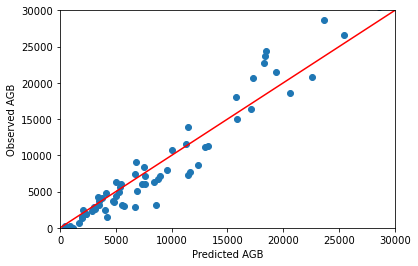

In [99]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1,30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.7139953920025026
MSE = 18434538.082
RMSE = 4293.546
bias = -988.270
n = 30


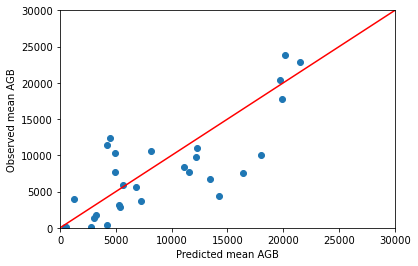

In [100]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [101]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [120]:
print("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl))

main_veg_indicies_mm_met_rem_RMSE_abr_sel_model


In [102]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [103]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

,target,fire_major,b1_wfp_dry_mean,b1_wdc_dry_major,b1_n17_dry_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_fdc_dry_major,...,dbifmdry_GNDVI,dbifmdry_CVI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
144,5778.08,0.00,3.17,1.00,6.00,101.42,102.23,145.26,105.29,1.00,...,3570379.00,30366450.00,1799100.00,405588.00,1215000.00,1086341.00,735000.00,1241135.00,1892866.00,2111825.00
184,9471.00,8.00,17.22,2.00,8.00,103.50,104.50,179.02,112.07,2.00,...,4404715.00,32433582.00,1149782.00,-32626.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
114,4724.00,0.00,27.33,2.00,7.00,102.10,103.68,158.17,109.29,3.00,...,5931818.00,60894375.00,2172012.00,2921659.00,1566000.00,2093748.00,1268000.00,2396070.00,4315861.00,5869981.00
138,6946.78,8.00,24.56,2.00,8.00,103.85,108.00,151.58,113.57,2.00,...,4872010.00,40868100.00,1698370.00,2326957.00,1161000.00,1514626.00,911000.00,1790253.00,3459932.00,4345982.00
181,23704.69,0.00,56.89,3.00,1.00,104.97,110.21,151.19,118.41,3.00,...,6511548.00,59773040.00,1161572.00,4497579.00,1889000.00,2971650.00,1756000.00,3278566.00,5787739.00,9359865.00
159,8984.91,0.00,49.50,3.00,4.00,104.72,109.95,150.23,118.20,3.00,...,6296296.00,53159184.00,942699.00,4031891.00,1666000.00,2691884.00,1564000.00,3027878.00,5691412.00,9083741.00
183,22731.51,0.00,45.58,3.00,8.00,104.70,109.83,151.26,117.52,3.00,...,5906478.00,51883004.00,1435445.00,2511305.00,1541000.00,2298430.00,1362000.00,2623267.00,4885222.00,7059421.00
148,10544.60,8.00,46.33,3.00,4.00,105.40,109.15,162.90,118.65,3.00,...,5869400.00,50566339.00,1365079.00,3148789.00,1546000.00,2316312.00,1374000.00,2640277.00,4896650.00,7085065.00
164,17598.35,0.00,29.92,2.00,8.00,104.29,108.91,153.49,115.75,3.00,...,5502283.00,50971510.00,1931741.00,1964758.00,1446000.00,1912610.00,1163000.00,2205157.00,3995191.00,5266511.00
47,2215.29,9.00,2.33,1.00,2.00,101.16,102.01,155.80,105.36,1.00,...,4131898.00,32846562.00,1539457.00,-557554.00,921000.00,1137112.00,683000.00,1372037.00,2768545.00,3287946.00


In [104]:
c_list = unseen_data.columns.tolist()
c_list

['target',
 'fire_major',
 'b1_wfp_dry_mean',
 'b1_wdc_dry_major',
 'b1_n17_dry_major',
 'b1_hsd_mean',
 'b1_hmc_mean',
 'b1_hcv_mean',
 'b1_h99_mean',
 'b1_fdc_dry_major',
 'b1_ccw_dry_mean',
 'b1_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']

In [105]:
df = unseen_data[column_var]

In [106]:
df

,target,dbifmdry_GNDVI,b1_hsd_mean,dbifmdry_NBR,b2_dp1fm_dry_mean,b1_hmc_mean,dbifmdry_NDVI,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,b6_dbifm_dry_mean,...,b1_dbifm_dry_mean,b1_wfp_dry_mean,b1_ccw_dry_mean,b1_h99_mean,b3_dbifm_dry_mean,b1_dp1fm_dry_mean,dbifmdry_RI,b4_dbifm_dry_mean,dbifmdry_CVI,dbifmdry_GSAVI
144,5778.08,3570379.00,101.42,405588.00,4.00,102.23,1892866.00,2978.69,75.50,2129.25,...,662.69,3.17,5.57,105.29,1574.06,19.31,1799100.00,2309.12,30366450.00,2168868.00
184,9471.00,4404715.00,103.50,-32626.00,27.78,104.50,3428571.00,2360.00,46.33,1845.44,...,441.11,17.22,30.11,112.07,897.67,24.44,1149782.00,1833.33,32433582.00,2228628.00
114,4724.00,5931818.00,102.10,2921659.00,32.00,103.68,4315861.00,2161.11,64.44,1152.67,...,297.33,27.33,44.89,109.29,835.22,1.89,2172012.00,2103.11,60894375.00,3074607.00
138,6946.78,4872010.00,103.85,2326957.00,29.67,108.00,3459932.00,1672.00,41.00,1103.67,...,382.11,24.56,40.78,113.57,861.11,27.67,1698370.00,1772.67,40868100.00,2358797.00
181,23704.69,6511548.00,104.97,4497579.00,53.00,110.21,5787739.00,1976.44,44.00,909.44,...,279.44,56.89,79.00,118.41,639.89,1.33,1161572.00,2395.33,59773040.00,3586255.00
159,8984.91,6296296.00,104.72,4031891.00,48.92,109.95,5691412.00,1811.25,44.50,917.58,...,236.42,49.50,71.08,118.20,592.67,5.25,942699.00,2156.00,53159184.00,3268376.00
183,22731.51,5906478.00,104.70,2511305.00,45.33,109.83,4885222.00,1926.33,41.00,1242.67,...,328.00,45.58,67.92,117.52,713.33,12.33,1435445.00,2075.67,51883004.00,3037850.00
148,10544.60,5869400.00,105.40,3148789.00,43.33,109.15,4896650.00,1921.56,49.33,1089.22,...,328.67,46.33,68.67,118.65,716.11,5.78,1365079.00,2090.22,50566339.00,3037726.00
164,17598.35,5502283.00,104.29,1964758.00,33.83,108.91,3995191.00,1986.08,45.33,1368.92,...,312.83,29.92,48.08,115.75,874.42,19.33,1931741.00,2037.92,50971510.00,2843471.00
47,2215.29,4131898.00,101.16,-557554.00,8.89,102.01,2768545.00,2636.78,83.67,1761.89,...,377.78,2.33,4.89,105.36,892.00,5.89,1539457.00,1575.67,32846562.00,1911053.00


In [107]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

(25, 21)


In [108]:
# dfx = df1[:1]
# dfy = df1[1:]

In [109]:
df1.columns

Index(['target', 'dbifmdry_GNDVI', 'b1_hsd_mean', 'dbifmdry_NBR',
       'b2_dp1fm_dry_mean', 'b1_hmc_mean', 'dbifmdry_NDVI',
       'b5_dbifm_dry_mean', 'b3_dp1fm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_MSR', 'b1_dbifm_dry_mean', 'b1_wfp_dry_mean',
       'b1_ccw_dry_mean', 'b1_h99_mean', 'b3_dbifm_dry_mean',
       'b1_dp1fm_dry_mean', 'dbifmdry_RI', 'b4_dbifm_dry_mean', 'dbifmdry_CVI',
       'dbifmdry_GSAVI'],
      dtype='object')

In [110]:
column_var

['target',
 'dbifmdry_GNDVI',
 'b1_hsd_mean',
 'dbifmdry_NBR',
 'b2_dp1fm_dry_mean',
 'b1_hmc_mean',
 'dbifmdry_NDVI',
 'b5_dbifm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_MSR',
 'b1_dbifm_dry_mean',
 'b1_wfp_dry_mean',
 'b1_ccw_dry_mean',
 'b1_h99_mean',
 'b3_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'dbifmdry_RI',
 'b4_dbifm_dry_mean',
 'dbifmdry_CVI',
 'dbifmdry_GSAVI']

In [111]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 144 to 158
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             25 non-null     float64
 1   dbifmdry_GNDVI     25 non-null     float64
 2   b1_hsd_mean        25 non-null     float64
 3   dbifmdry_NBR       25 non-null     float64
 4   b2_dp1fm_dry_mean  25 non-null     float64
 5   b1_hmc_mean        25 non-null     float64
 6   dbifmdry_NDVI      25 non-null     float64
 7   b5_dbifm_dry_mean  25 non-null     float64
 8   b3_dp1fm_dry_mean  25 non-null     float64
 9   b6_dbifm_dry_mean  25 non-null     float64
 10  dbifmdry_MSR       25 non-null     float64
 11  b1_dbifm_dry_mean  25 non-null     float64
 12  b1_wfp_dry_mean    25 non-null     float64
 13  b1_ccw_dry_mean    25 non-null     float64
 14  b1_h99_mean        25 non-null     float64
 15  b3_dbifm_dry_mean  25 non-null     float64
 16  b1_dp1fm_dry_mean  25 non

In [112]:
df1

,target,dbifmdry_GNDVI,b1_hsd_mean,dbifmdry_NBR,b2_dp1fm_dry_mean,b1_hmc_mean,dbifmdry_NDVI,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,b6_dbifm_dry_mean,...,b1_dbifm_dry_mean,b1_wfp_dry_mean,b1_ccw_dry_mean,b1_h99_mean,b3_dbifm_dry_mean,b1_dp1fm_dry_mean,dbifmdry_RI,b4_dbifm_dry_mean,dbifmdry_CVI,dbifmdry_GSAVI
144,5778.08,3570379.00,101.42,405588.00,4.00,102.23,1892866.00,2978.69,75.50,2129.25,...,662.69,3.17,5.57,105.29,1574.06,19.31,1799100.00,2309.12,30366450.00,2168868.00
184,9471.00,4404715.00,103.50,-32626.00,27.78,104.50,3428571.00,2360.00,46.33,1845.44,...,441.11,17.22,30.11,112.07,897.67,24.44,1149782.00,1833.33,32433582.00,2228628.00
114,4724.00,5931818.00,102.10,2921659.00,32.00,103.68,4315861.00,2161.11,64.44,1152.67,...,297.33,27.33,44.89,109.29,835.22,1.89,2172012.00,2103.11,60894375.00,3074607.00
138,6946.78,4872010.00,103.85,2326957.00,29.67,108.00,3459932.00,1672.00,41.00,1103.67,...,382.11,24.56,40.78,113.57,861.11,27.67,1698370.00,1772.67,40868100.00,2358797.00
181,23704.69,6511548.00,104.97,4497579.00,53.00,110.21,5787739.00,1976.44,44.00,909.44,...,279.44,56.89,79.00,118.41,639.89,1.33,1161572.00,2395.33,59773040.00,3586255.00
159,8984.91,6296296.00,104.72,4031891.00,48.92,109.95,5691412.00,1811.25,44.50,917.58,...,236.42,49.50,71.08,118.20,592.67,5.25,942699.00,2156.00,53159184.00,3268376.00
183,22731.51,5906478.00,104.70,2511305.00,45.33,109.83,4885222.00,1926.33,41.00,1242.67,...,328.00,45.58,67.92,117.52,713.33,12.33,1435445.00,2075.67,51883004.00,3037850.00
148,10544.60,5869400.00,105.40,3148789.00,43.33,109.15,4896650.00,1921.56,49.33,1089.22,...,328.67,46.33,68.67,118.65,716.11,5.78,1365079.00,2090.22,50566339.00,3037726.00
164,17598.35,5502283.00,104.29,1964758.00,33.83,108.91,3995191.00,1986.08,45.33,1368.92,...,312.83,29.92,48.08,115.75,874.42,19.33,1931741.00,2037.92,50971510.00,2843471.00
47,2215.29,4131898.00,101.16,-557554.00,8.89,102.01,2768545.00,2636.78,83.67,1761.89,...,377.78,2.33,4.89,105.36,892.00,5.89,1539457.00,1575.67,32846562.00,1911053.00


In [113]:
list(df1.columns)

['target',
 'dbifmdry_GNDVI',
 'b1_hsd_mean',
 'dbifmdry_NBR',
 'b2_dp1fm_dry_mean',
 'b1_hmc_mean',
 'dbifmdry_NDVI',
 'b5_dbifm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_MSR',
 'b1_dbifm_dry_mean',
 'b1_wfp_dry_mean',
 'b1_ccw_dry_mean',
 'b1_h99_mean',
 'b3_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'dbifmdry_RI',
 'b4_dbifm_dry_mean',
 'dbifmdry_CVI',
 'dbifmdry_GSAVI']

In [114]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [115]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [116]:
xdata1.shape

(98, 20)

In [117]:
ydata.shape

(25, 1)

Predicted data r2 = 0.5376455033538607
MSE = 134519249.625
RMSE = 11598.243
explained_var = 0.555
bias = 1091.792
n = 25


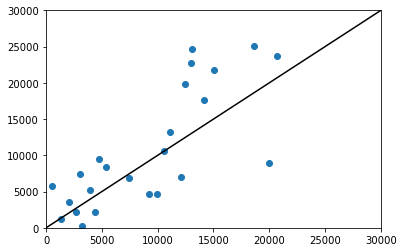

In [119]:
with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata) #,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1, 30000)
plt.ylim(-1, 30000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open("{0}_{1}_{2}_{3}_sel_data".format(var_, d_type, fac, mdl)', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()